# Minha primeira análise de dados- Distribuição de Renda e Desigualdade de Gênero

Oi gente, eu sou o João Pedro Apolonio e essa analise de dados é a minha primeira no caminho de Cientista de Dados, nesse momento estou no primeiro semestre de Estatística na USP. 

As informações aqui contidas foram retiradas de um banco de dados do site Glassdoor, que é um site onde funcionários podem avaliar suas empresas e vice versa, além de buscar vagas de emprego. Você pode acessá-lo aqui: https://www.kaggle.com/nilimajauhari/glassdoor-analyze-gender-pay-gap

Espero que vocês gostem e descubram algo interessante a partir das minhas análises, vamos lá!

Roteiro:

1)Análise de Dados Contínuos(Parte mais técnica):

    - Compreender os dados e fazer Histogramas de features numéricas
    - Analisar correlações entre variáveis
    (A partir daqui as coisas ficam menos técnicas e mais interessantes para quem não é da Ciência de Dados)
    - Analisar a diferença salarial, de bônus e renda total entre gêneros

2)Análise de Dados Categóricos:

    - Analise de cada carreira sobre sua desigualde salarial entre gêneros e sua quantidade de homens e mulheres.
    - Discussão do emprego mais desigual e o mais justo entre os gêneros.
    - Como a desigualdade se comporta conforme os níveis de educação aumentam?
    - A Desigualdade de Renda aumenta ou diminui com a experiência e aumento da Senioridade?

3)Regressão Linear

## Set up

In [126]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [127]:
data= pd.read_csv('Glassdoor Gender Pay Gap.csv')
dados_mulheres= data[data['Gender']== 'Female']
dados_homens= data[data['Gender']== 'Male']

# Dados Contínuos

### Primeiramente, vamos compreender os dados e fazer histogramas das features numéricas


In [176]:
data.head()

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938
1,Software Engineer,Male,21,5,College,Management,5,108476,11128
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319


In [129]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   JobTitle   1000 non-null   object
 1   Gender     1000 non-null   object
 2   Age        1000 non-null   int64 
 3   PerfEval   1000 non-null   int64 
 4   Education  1000 non-null   object
 5   Dept       1000 non-null   object
 6   Seniority  1000 non-null   int64 
 7   BasePay    1000 non-null   int64 
 8   Bonus      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


Ok, nenhum valor faltando

In [134]:
data.describe()

,Age,PerfEval,Seniority,BasePay,Bonus
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,41.393000,3.037000,2.971000,94472.653000,6467.161000
std,14.294856,1.423959,1.395029,25337.493272,2004.377365
min,18.000000,1.000000,1.000000,34208.000000,1703.000000
25%,29.000000,2.000000,2.000000,76850.250000,4849.500000
50%,41.000000,3.000000,3.000000,93327.500000,6507.000000
75%,54.250000,4.000000,4.000000,111558.000000,8026.000000
max,65.000000,5.000000,5.000000,179726.000000,11293.000000


- A idade varia muito, std/mean =0,345
- É possível ver que o Bônus varia muito com std/mean = 0,309

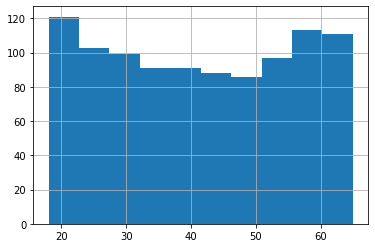

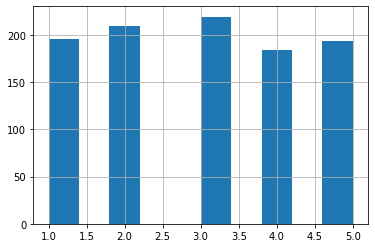

In [135]:
data['Age'].hist()
plt.show()
data['Seniority'].hist()
plt.show()

Idade bem variada e todos os níveis de senioridade estão bem representados.

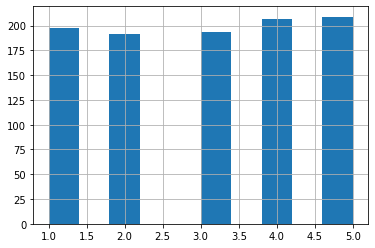

In [136]:
data['PerfEval'].hist()
plt.show()

Avaliação dos funcionários é bem distribuida

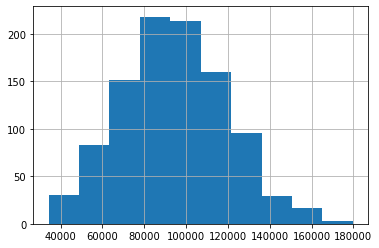

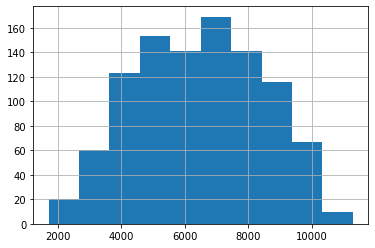

In [133]:
data['BasePay'].hist()
plt.show()
data['Bonus'].hist()
plt.show()

O salário e o bônus parecem seguir uma curva normal, mas o salário é mais concentrado e o bônus varia mais.

### Vejamos agora a influência de variáveis sobre as outras com testes de covariância:

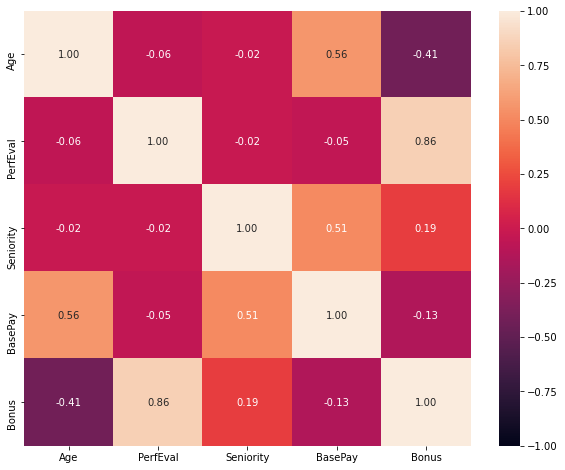

In [143]:
plt.figure(figsize=(10, 8))  
sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, fmt='.2f')
plt.show()

Em correlações(como na matriz acima), quanto mais perto de 0, menor a relação entre as variáveis, e quanto mais perto de 1 ou -1, maior a relação(o sinal de menos indica que o aumento de uma característica diminui a outra e o sinal de mais significa que quando uma aumenta, a outra também "sobe")

Olhando a Matriz acima, vemos que salário está muito relacionado com a senioridade e principalmente com a idade. O bônus pode ter alguma influência diminuindo o salário base, mas não é muito significativo, pois está muito perto do 0. O bônus é muito fortemente relacionado com a avaliação da pessoa como funcionário.

Agora, vamos analizar mais a fundo a relação do salário com a idade, senioridade, avaliação como funcionário e por fim se quem recebe mais salário também recebe mais bônus. 

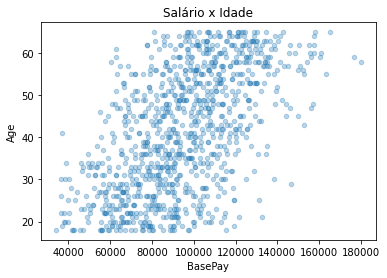

Correlação = 0.5626812686863853


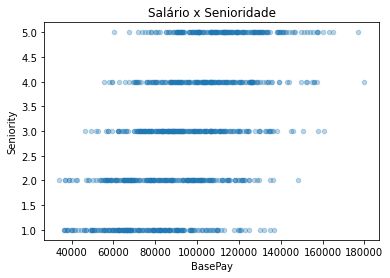

Correlação = 0.5110963118464695


In [144]:
data.plot(x='BasePay', y='Age', alpha=.3, kind='scatter', title= 'Salário x Idade')
plt.show()
print('Correlação =', data['BasePay'].corr(data['Age']))
data.plot(x='BasePay', y='Seniority', alpha=.3, kind='scatter', title= 'Salário x Senioridade')
plt.show()
print('Correlação =', data['BasePay'].corr(data['Seniority']))

A senioridade é avaliada em números inteiros e por isso os pontos estão bem divididos em linhas. É possível constatar que conforme o nível sênior aumenta, maior tende a ser o salário, talvez por isso que a idade também está muito relacionada com o salário. Mas é interessante ver que a idade em si influencia mais do que seus anos de experiência (A idade tem correlação 0,56 e a Senioridade tem apenas 0,51 ambos em relação ao salário).

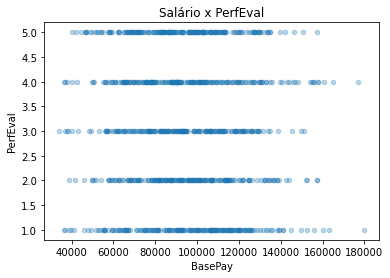

Correlação = -0.053622482135118575


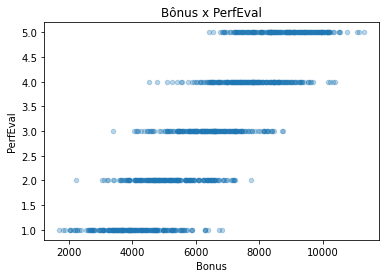

Correlação = 0.8554995700665279


In [145]:
data.plot(x='BasePay', y='PerfEval', alpha=.3, kind='scatter', title= 'Salário x PerfEval')
plt.show()
print('Correlação =', data['BasePay'].corr(data['PerfEval']))

data.plot(x='Bonus', y='PerfEval', alpha=.3, kind='scatter', title= 'Bônus x PerfEval')
plt.show()
print('Correlação =', data['Bonus'].corr(data['PerfEval']))

A avaliação como funcionário influencia pouco o salário, no entanto influencia muito fortemente o bônus.

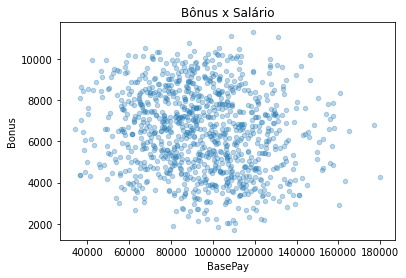

Correlação = -0.12948070482622634


In [147]:
data.plot(x='BasePay', y='Bonus', alpha=.3, kind='scatter', title= 'Bônus x Salário')
plt.show()

print('Correlação =', data['BasePay'].corr(data['Bonus']))

A relação entre Bônus e salário não é bem correlacionada e um parece não influenciar o outro

### Vamos analisar agora a diferença salarial entre homens e mulheres

O valor esperado do salário de uma mulher é 89942 e a expectativa para um homem é 98457 Dólares.
A diferença salarial média entre um homem e uma mulher é de 8514 Dólares e um homem tende a ganhar 9% a mais!

Gráfico da Distribuição de salários sem Bônus por Gênero:

Mulheres em laranja
Homens em azul


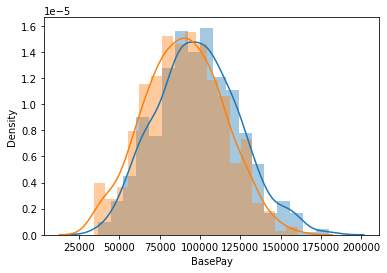

In [158]:
sns.distplot(dados_homens['BasePay'], bins=18)
sns.distplot(dados_mulheres['BasePay'], bins=18)

media_salario_mulher=dados_mulheres['BasePay'].mean()
media_salario_homem= dados_homens['BasePay'].mean()
print('O valor esperado do salário de uma mulher é', int(media_salario_mulher),'e a expectativa para um homem é', int(media_salario_homem), 'Dólares.')

diferença_salarial= media_salario_homem- media_salario_mulher
quanto_homem_ganha_mais= int(((media_salario_homem/media_salario_mulher)-1)*100)
print(f'A diferença salarial média entre um homem e uma mulher é de {int(diferença_salarial)} Dólares e um homem tende a ganhar {quanto_homem_ganha_mais}% a mais!')
print('')
print('Gráfico da Distribuição de salários sem Bônus por Gênero:')
print('')
print('Mulheres em laranja')
print('Homens em azul')

Vamos observar agora a diferença de gênero em relação ao recebmento de bônus

O valor esperado do bônus de uma mulher é 6474  Dólares e a expectativa para um homem é 6461 Dólares.
A diferença de bônus médio entre um homem e uma mulher é de -12 Dólares e um homem tende a ganhar 0% a mais!

Gráfico da Distribuição de Bônus por Gênero:

Mulheres em laranja
Homens em azul


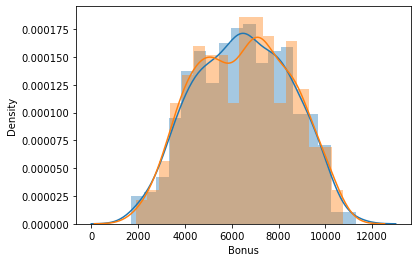

In [156]:
sns.distplot(dados_homens['Bonus'], bins=18)
sns.distplot(dados_mulheres['Bonus'], bins=18)

media_salario_mulher=dados_mulheres['Bonus'].mean()
media_salario_homem= dados_homens['Bonus'].mean()
print('O valor esperado do bônus de uma mulher é', int(media_salario_mulher),' Dólares e a expectativa para um homem é', int(media_salario_homem), 'Dólares.')

diferença_salarial= media_salario_homem- media_salario_mulher
quanto_homem_ganha_mais= int(((media_salario_homem/media_salario_mulher)-1)*100)
print(f'A diferença de bônus médio entre um homem e uma mulher é de {int(diferença_salarial)} Dólares e um homem tende a ganhar {quanto_homem_ganha_mais}% a mais!')
print('')
print('Gráfico da Distribuição de Bônus por Gênero:')
print('')
print('Mulheres em laranja')
print('Homens em azul')

É possível pensar que felizmente, pelo menos em relação ao valor de bônus recebido, a diferença de gênero quase não afeta os valores recebidos.

Vamos ver a relação de salário total:

O valor esperado do salário de uma mulher é 96416  Dólares e a expectativa para um homem é 104918 Dólares.
A diferença do salario médio total entre um homem e uma mulher é de 8501 Dólares e um homem tende a ganhar 8% a mais!

Gráfico da Distribuição de salários sem Bônus por Gênero:

Mulheres em laranja
Homens em azul


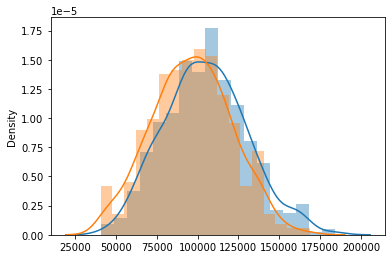

In [155]:
sns.distplot(dados_homens['BasePay']+dados_homens['Bonus'], bins=18)
sns.distplot(dados_mulheres['BasePay']+dados_mulheres['Bonus'], bins=18)

media_salario_total_mulher=dados_mulheres['BasePay'].mean()+dados_mulheres['Bonus'].mean()
media_salario_total_homem= dados_homens['BasePay'].mean()+dados_homens['Bonus'].mean()
print('O valor esperado do salário de uma mulher é', int(media_salario_total_mulher),' Dólares e a expectativa para um homem é', int(media_salario_total_homem), 'Dólares.')

diferença_salarial= media_salario_total_homem- media_salario_total_mulher
quanto_homem_ganha_mais= int(((media_salario_total_homem/media_salario_total_mulher)-1)*100)
print(f'A diferença do salario médio total entre um homem e uma mulher é de {int(diferença_salarial)} Dólares e um homem tende a ganhar {quanto_homem_ganha_mais}% a mais!')
print('')
print('Gráfico da Distribuição de salários com Bônus por Gênero:')
print('')
print('Mulheres em laranja')
print('Homens em azul')

Por que essa desigualdade? Vamos ver a avaliação como funcionário para homens e mulheres para tentar entender isso:

Gráfico das avaliações como funcionário por Gênero.

Mulheres em laranja
Homens em azul


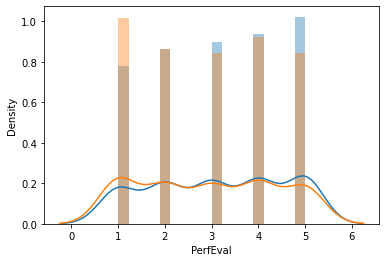

In [159]:
sns.distplot(dados_homens['PerfEval'], bins=18)
sns.distplot(dados_mulheres['PerfEval'], bins=18)
print('Gráfico das avaliações como funcionário por Gênero.')
print('')
print('Mulheres em laranja')
print('Homens em azul')

Como é possível ver o trabalho das mulheres é menos bem-avaliado do que o dos homens, pois elas estão mais presentes nas piores avaliações e menos presentes entre as melhores. Essa pode ser uma das causas dessa desigualdade.

ATENÇÃO: Isso não quer dizer que as mulheres entreguem um trabalho pior que o dos homens necessariamente. Talvez seus esforços não sejam reconhecidos pelos colegas e chefes com a mesma facilidade que o empenho de um homem é, ela seja criticada e cobrada em mais quesitos, como estética, ou exista algum outro fator que afete essa avaliação, como o Machismo.

Lembre-se também que a maior parte do salário(BasePay) não é muito relacionada pela avaliação como funcionário como vimos na parte mais técnica.

Na análise de dados categóricos vamos ver como outras variáveis como educação e senioridade impactam o salário e compararemos com a diferença salarial entre gêneros (lembre-se que a diferença de renda total aqui é de 8%) além da evolução da desigualdade com maiores níveis de educação.

# Análise de Dados Categóricos

### Primeiramente vamos analizar dentro de cada emprego como é a desigualdade salarial entre os gêneros e se existem áreas que são predominantemente ocupadas por homens ou mulheres. 

Sinta-se a vontade para olhar apenas as profissões que lhe sejam interessantes.


Gráfico distribuição de salário por gênero na profissão Graphic Designer

Mulheres em laranja
Homens em azul


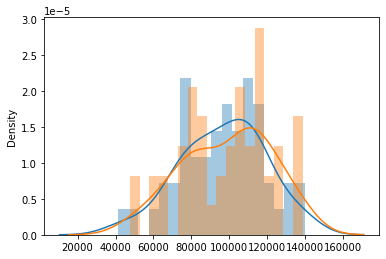

Número de mulheres = 48, número de homens = 50
Média salarial mulheres = 92243 Dólares
Média salarial homens = 89595 Dólares
Homens ganham -2647 Dólares a mais do que as mulheres

Gráfico distribuição de salário por gênero na profissão Driver

Mulheres em laranja
Homens em azul


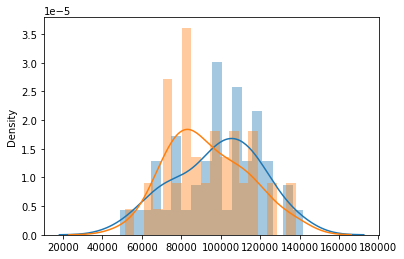

Número de mulheres = 46, número de homens = 45
Média salarial mulheres = 86867 Dólares
Média salarial homens = 91952 Dólares
Homens ganham 5085 Dólares a mais do que as mulheres

Gráfico distribuição de salário por gênero na profissão Sales Associate

Mulheres em laranja
Homens em azul


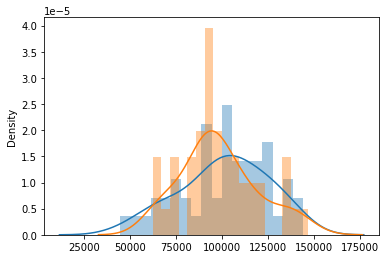

Número de mulheres = 43, número de homens = 51
Média salarial mulheres = 91894 Dólares
Média salarial homens = 94663 Dólares
Homens ganham 2768 Dólares a mais do que as mulheres

Gráfico distribuição de salário por gênero na profissão Financial Analyst

Mulheres em laranja
Homens em azul


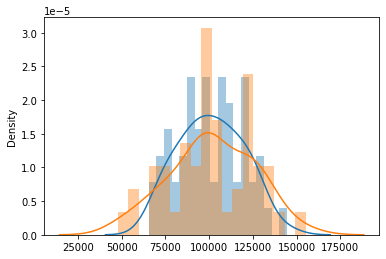

Número de mulheres = 49, número de homens = 58
Média salarial mulheres = 95458 Dólares
Média salarial homens = 94607 Dólares
Homens ganham -851 Dólares a mais do que as mulheres

Gráfico distribuição de salário por gênero na profissão Manager

Mulheres em laranja
Homens em azul


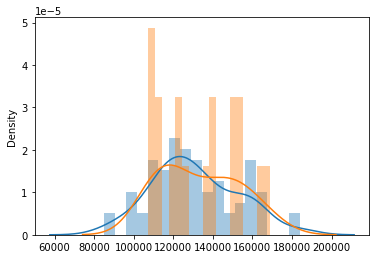

Número de mulheres = 18, número de homens = 72
Média salarial mulheres = 127252 Dólares
Média salarial homens = 124848 Dólares
Homens ganham -2403 Dólares a mais do que as mulheres

Gráfico distribuição de salário por gênero na profissão Software Engineer

Mulheres em laranja
Homens em azul


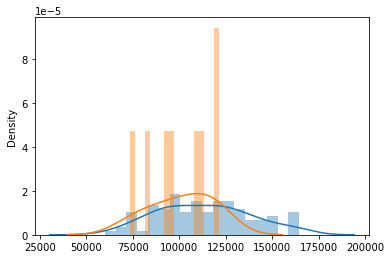

Número de mulheres = 8, número de homens = 101
Média salarial mulheres = 94701 Dólares
Média salarial homens = 106371 Dólares
Homens ganham 11670 Dólares a mais do que as mulheres

Gráfico distribuição de salário por gênero na profissão Marketing Associate

Mulheres em laranja
Homens em azul


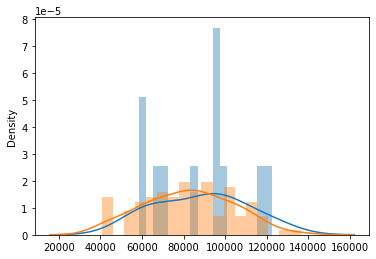

Número de mulheres = 107, número de homens = 11
Média salarial mulheres = 76119 Dólares
Média salarial homens = 81881 Dólares
Homens ganham 5762 Dólares a mais do que as mulheres

Gráfico distribuição de salário por gênero na profissão Data Scientist

Mulheres em laranja
Homens em azul


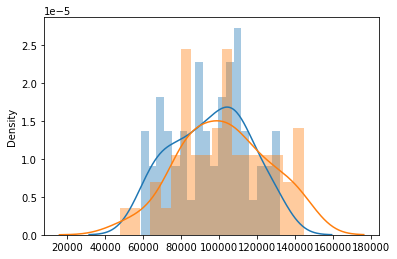

Número de mulheres = 53, número de homens = 54
Média salarial mulheres = 95704 Dólares
Média salarial homens = 89222 Dólares
Homens ganham -6482 Dólares a mais do que as mulheres

Gráfico distribuição de salário por gênero na profissão IT

Mulheres em laranja
Homens em azul


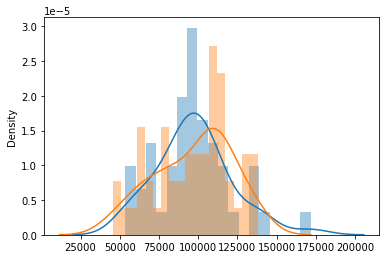

Número de mulheres = 50, número de homens = 46
Média salarial mulheres = 90475 Dólares
Média salarial homens = 91021 Dólares
Homens ganham 546 Dólares a mais do que as mulheres

Gráfico distribuição de salário por gênero na profissão Warehouse Associate

Mulheres em laranja
Homens em azul


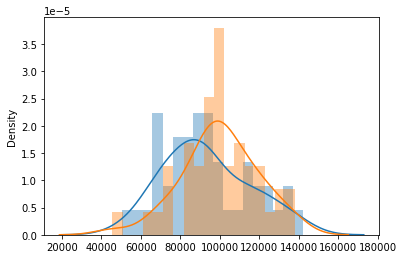

Número de mulheres = 46, número de homens = 44
Média salarial mulheres = 92428 Dólares
Média salarial homens = 86553 Dólares
Homens ganham -5874 Dólares a mais do que as mulheres


In [160]:
Jobs = data['JobTitle'].tolist()
Jobs = list(set(Jobs))
maior_desigualdade=menor_desigualdade=0
for i in Jobs:
    print('')
    print(f'Gráfico distribuição de salário por gênero na profissão {i}:')
    print('')
    print('Mulheres em laranja')
    print('Homens em azul')
    
    data_job=data[data['JobTitle']== i]
    soma_h=data_job[data_job['Gender']=='Male']['BasePay']+data_job[data_job['Gender']=='Male']['Bonus']
    soma_m=data_job[data_job['Gender']=='Female']['BasePay']+data_job[data_job['Gender']=='Female']['Bonus']
    sns.distplot(soma_h, bins=18, hist=True)
    sns.distplot(soma_m, bins=18, hist=True)
    plt.show()
    
    data_job_f=data_job[data_job['Gender']=='Female']
    data_job_m=data_job[data_job['Gender']=='Male']
    print(f'Número de mulheres = {len(data_job_f.index)}, número de homens = {len(data_job_m.index)}')
    print(f"Média salarial mulheres = {int(data_job_f['BasePay'].mean())} Dólares")
    print(f"Média salarial homens = {int(data_job_m['BasePay'].mean())} Dólares")
    print(f"Homens ganham {int(data_job_m['BasePay'].mean()-data_job_f['BasePay'].mean())} Dólares a mais do que as mulheres")
    #daqui pra baixo vou separar qual o emprego que tem a maior desigualdade e qual tem a menor para analizarmos depois
    a=data_job_f['BasePay'].mean()
    b=data_job_m['BasePay'].mean()
    c=0
    if a!=0 and b!=0:
        c=b-a
        if c>maior_desigualdade:
            maior_desigualdade=c
            jobinjusto=i
        if c<menor_desigualdade:
            menor_desigualdade=c
            jobjusto=i



Vamos analisar separadamente os trabalhos mais e menos desiguais:

O trabalho que é mais justo com as mulheres é o de Data Scientist, com diferença salarial entre homens e mulheres de -6482 Dólares.

Enquanto isso o trabalho menos justo com as mulheres é o de Software Engineer, lá as mulheres ganham 11670 Dólares a menos que homens.


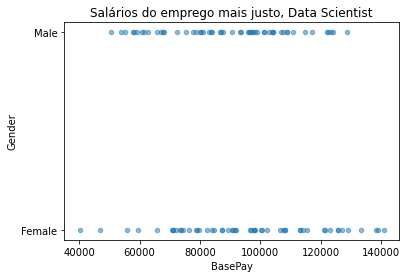

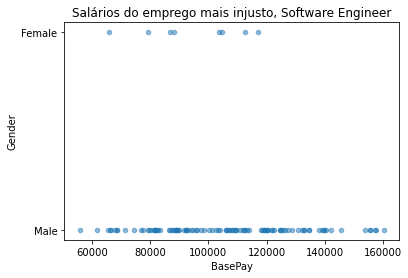

In [162]:
print(f'O trabalho que é mais justo com as mulheres é o de {jobjusto}, com diferença salarial entre homens e mulheres de {int(menor_desigualdade)} Dólares.')
print('')
print(f'Enquanto isso o trabalho menos justo com as mulheres é o de {jobinjusto}, lá as mulheres ganham {int(maior_desigualdade)} Dólares a menos que homens.')
data_job_justo=data[data['JobTitle']== jobjusto]
data_job_injusto=data[data['JobTitle']== jobinjusto]
data_job_justo.plot(x='BasePay', y='Gender', alpha=.5, kind='scatter', title= f'Salários do emprego mais justo, {jobjusto}')
plt.show()
data_job_injusto.plot(x='BasePay', y='Gender', alpha=.5, kind='scatter', title= f'Salários do emprego mais injusto, {jobinjusto}')
plt.show()

É isso mesmo as mulheres ganham mais do que os homens na área de ciência de dados e elas são muito bem representadas com 54 homens e 53 mulheres! 

Perceba que não apenas as mulheres ganham menos como Engenheiras de Software como também são muito raras(8) em proporção aos homens(101)!

### Vamos ver agora se o nível de escolaridade aumenta ou diminui a desigualdade de renda:

A diferença salarial entre homens e mulheres com Ensino Médio é 5390 Dólares.

Gráfico do salário de homens e mulheres com nível educacional Ensino Médio completo:

Mulheres em laranja
Homens em azul


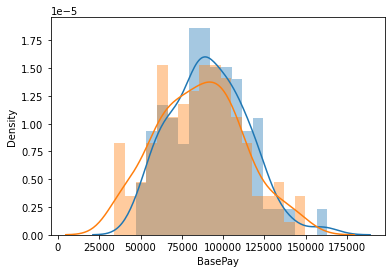

In [172]:
homem_com_HS=dados_homens[dados_homens['Education']== 'High School']['BasePay']
mulher_com_HS= dados_mulheres[dados_mulheres['Education']== 'High School']['BasePay']
sns.distplot(homem_com_HS, bins=18)
sns.distplot(mulher_com_HS, bins=18)
mi_homem_com_HS=homem_com_HS.mean()
mi_mulher_com_HS=mulher_com_HS.mean()

print(f'A diferença salarial entre homens e mulheres com Ensino Médio é', int(mi_homem_com_HS-mi_mulher_com_HS), 'Dólares.')
print('')
print('Gráfico do salário de homens e mulheres com nível educacional Ensino Médio completo:')
print('')
print('Mulheres em laranja')
print('Homens em azul')

A diferença salarial entre homens e mulheres com graduação é 11927 Dólares

Gráfico do salário de homens e mulheres com nível educacional Graduação completa

Mulheres em laranja
Homens em azul


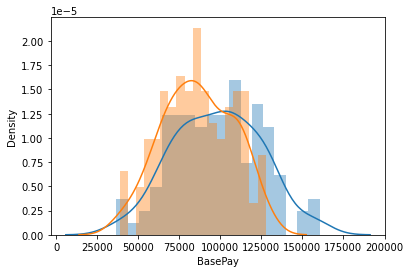

In [173]:
homem_com_sup= dados_homens[dados_homens['Education']== 'College']['BasePay']
mulher_com_sup= dados_mulheres[dados_mulheres['Education']== 'College']['BasePay']
sns.distplot(homem_com_sup, bins=18)
sns.distplot(mulher_com_sup, bins=18)
mi_homem_com_sup=homem_com_sup.mean()
mi_mulher_com_sup=mulher_com_sup.mean()
print(f'A diferença salarial entre homens e mulheres com graduação é', int(mi_homem_com_sup-mi_mulher_com_sup),'Dólares')
print('')
print('Gráfico do salário de homens e mulheres com nível educacional Graduação completa:')
print('')
print('Mulheres em laranja')
print('Homens em azul')

A diferença salarial entre homens e mulheres com Doutorado é 6199 Dólares

Gráfico do salário de homens e mulheres com nível educacional Ensino Médio:

Mulheres em laranja
Homens em azul


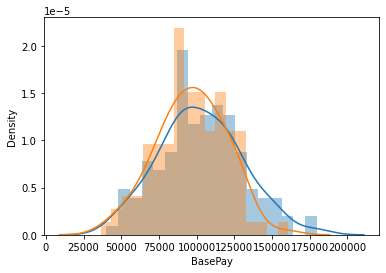

In [171]:
homem_com_PhD=dados_homens[dados_homens['Education']== 'PhD']['BasePay']
mulher_com_PhD= dados_mulheres[dados_mulheres['Education']== 'PhD']['BasePay']
sns.distplot(homem_com_PhD, bins=18)
sns.distplot(mulher_com_PhD, bins=18)
mi_homem_com_PhD=homem_com_PhD.mean()
mi_mulher_com_PhD=mulher_com_PhD.mean()

print(f'A diferença salarial entre homens e mulheres com Doutorado é', int(mi_homem_com_PhD-mi_mulher_com_PhD),'Dólares')
print('')
print('Gráfico do salário de homens e mulheres com nível educacional Doutorado:')
print('')
print('Mulheres em laranja')
print('Homens em azul')

Como é possível ver, após a saída do Ensino médio a Desigualdade não é muito acentuada, mas a partir da Graduação, o "Gap" aumenta substancialmente e vai diminuindo conforme o nível acadêmico aumenta.

Vejamos a evolução da Desigualdade Salarial por níveis de senioridade, sendo 1 um inicante e 5 alguém no final da carreira.

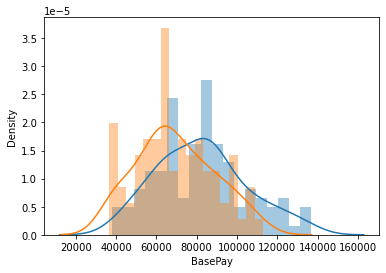

A diferença Salarial entre homens e mulheres no nível 1 de senioridade na carreira é 12831 Dólares.


Mulheres em laranja
Homens em azul


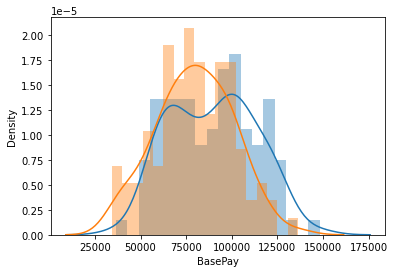

A diferença Salarial entre homens e mulheres no nível 2 de senioridade na carreira é 9967 Dólares.


Mulheres em laranja
Homens em azul


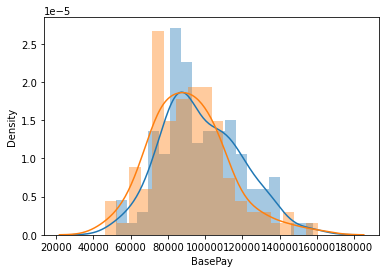

A diferença Salarial entre homens e mulheres no nível 3 de senioridade na carreira é 6584 Dólares.


Mulheres em laranja
Homens em azul


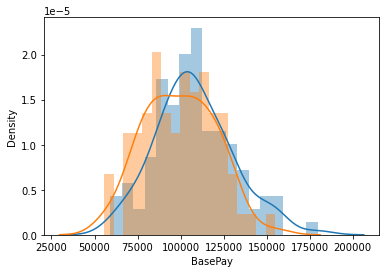

A diferença Salarial entre homens e mulheres no nível 4 de senioridade na carreira é 8527 Dólares.


Mulheres em laranja
Homens em azul


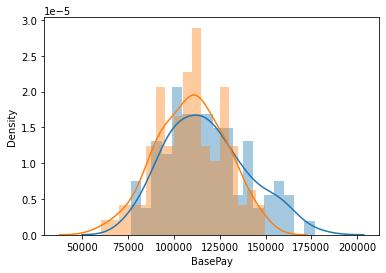

A diferença Salarial entre homens e mulheres no nível 5 de senioridade na carreira é 8600 Dólares.


Mulheres em laranja
Homens em azul


In [174]:
for i in range(1,6):
    Senioridade_Homem=dados_homens[dados_homens['Seniority']== i]['BasePay']
    Senioridade_Mulher=dados_mulheres[dados_mulheres['Seniority']== i]['BasePay']
    sns.distplot(Senioridade_Homem, bins=18)
    sns.distplot(Senioridade_Mulher, bins=18)
    mi_senioridade_hom=Senioridade_Homem.mean()
    mi_senioridade_mul=Senioridade_Mulher.mean()
    plt.show()
    print(f'A diferença Salarial entre homens e mulheres no nível {i} de senioridade na carreira é {int(mi_senioridade_hom-mi_senioridade_mul)} Dólares.')
    print('')
    print('')
    print('Mulheres em laranja')
    print('Homens em azul')

Como é possível observar, as mulheres iniciam suas carreiras ganhando menos que os homens, indicando que a desigualdade não necessariamente vem de características técnicas, mas sim pelo fato de serem mulheres. Felizmente conforme o nível de senioridade aumenta os salários se tornam mais meritocráticos e a desigualdade diminui.

# Regressão Linear

Por fim fiz um código de Regressão Linear. Por alto, isso é uma forma de tentar prever características a partir de outras.No caso, tentarei prever o Salário(BasePay) sabendo a Idade,Avaliação como funcionário, Sexo e o Cargo. 

Se você quiser saber mais sobre o tema, escrevi um Artigo super interessante explicando o tema de forma muito simples e didática, mostrando uma aplicação muito legal com dinossauros, se quiser dar uma olhada clique aqui:
https://docs.google.com/document/d/1q2fvUaRsIA9Os7-p4SwuG8NHZVIH6RXn381oXoBuFJ4/edit

No fim do programa é calculada a acurácia das previsões com base do meu algorítimo, vamos ver!

In [65]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score 
from sklearn.model_selection import train_test_split

In [175]:
dt = pd.DataFrame(data)
gender=pd.get_dummies(dt['Gender'])
dt=pd.concat([dt, gender], axis=1)
Trampo= pd.get_dummies(dt['JobTitle'])
dt=pd.concat([dt, Trampo], axis=1)
X = dt.iloc[:, [2,3,6,9,11,12,13,14,15,16,17,19,20]]#Selecionei as features Age, PerfEval, Seniority, Gender e o Nome do Cargo
y = dt.iloc[:, [7]] #Selecionei o target como BasePay
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=0) 
lr=LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

from sklearn.metrics import r2_score 

R2 = r2_score(y_test,y_pred)
print(R2)

0.7796316993801164


# MISSÃO COMPLETA, ACURÁCIA DE 78%!